In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [16]:
img = load_img()

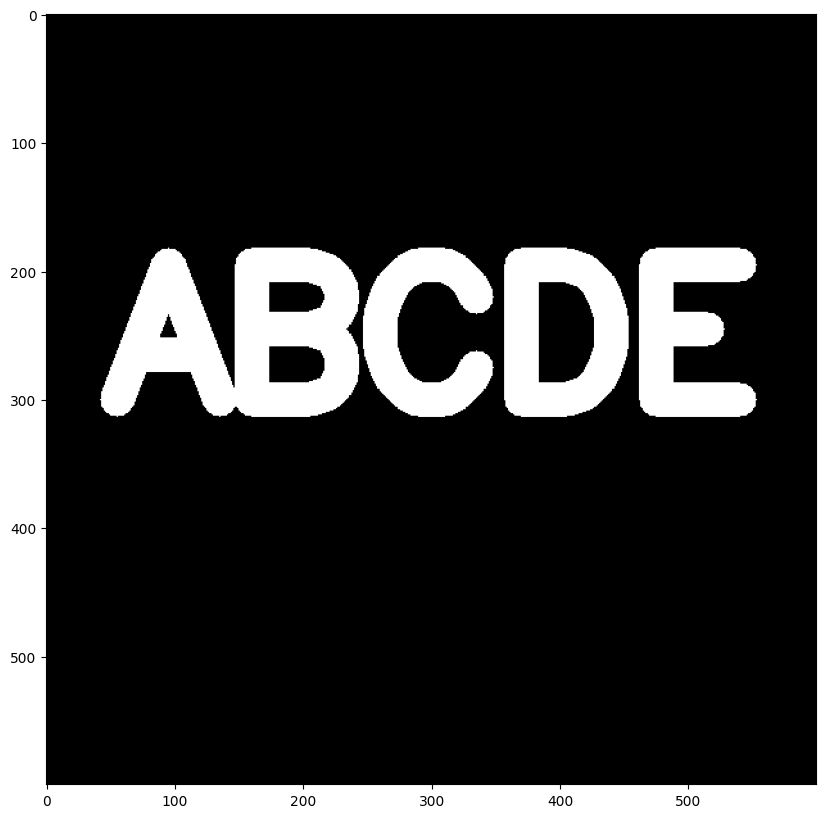

In [17]:
display_img(img)

In [18]:
#let's look at erosion

kernel = np.ones((5,5),dtype=np.uint8)

In [19]:
result = cv2.erode(img,kernel,iterations=4)

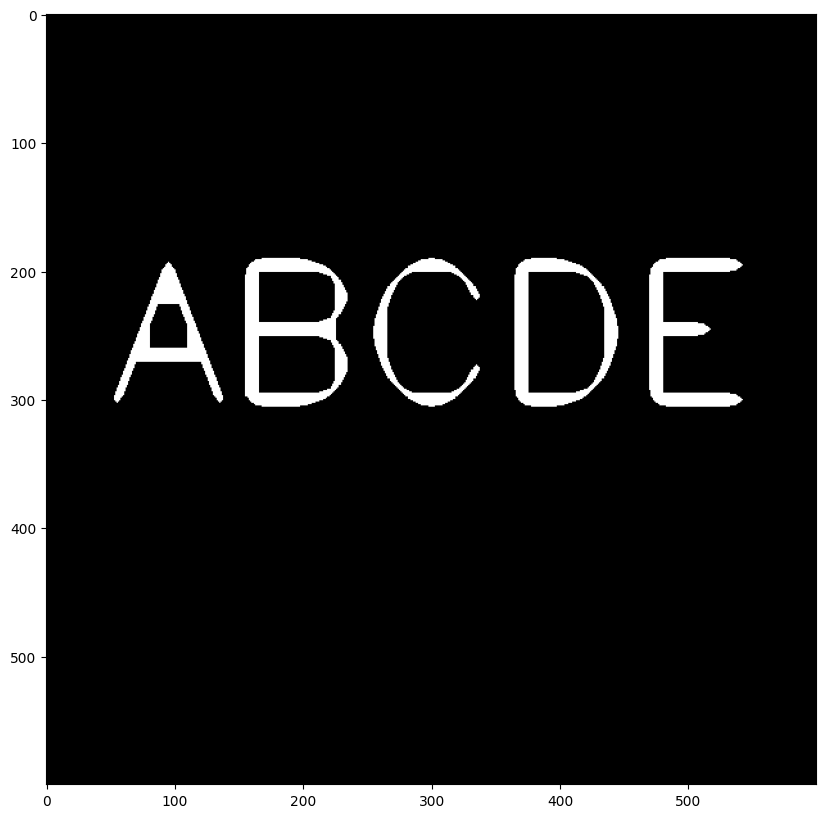

In [20]:
display_img(result)

In [21]:
# let's look at opening (erosion + dilation)

In [22]:
img = load_img()

In [23]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [24]:
white_noise

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0]])

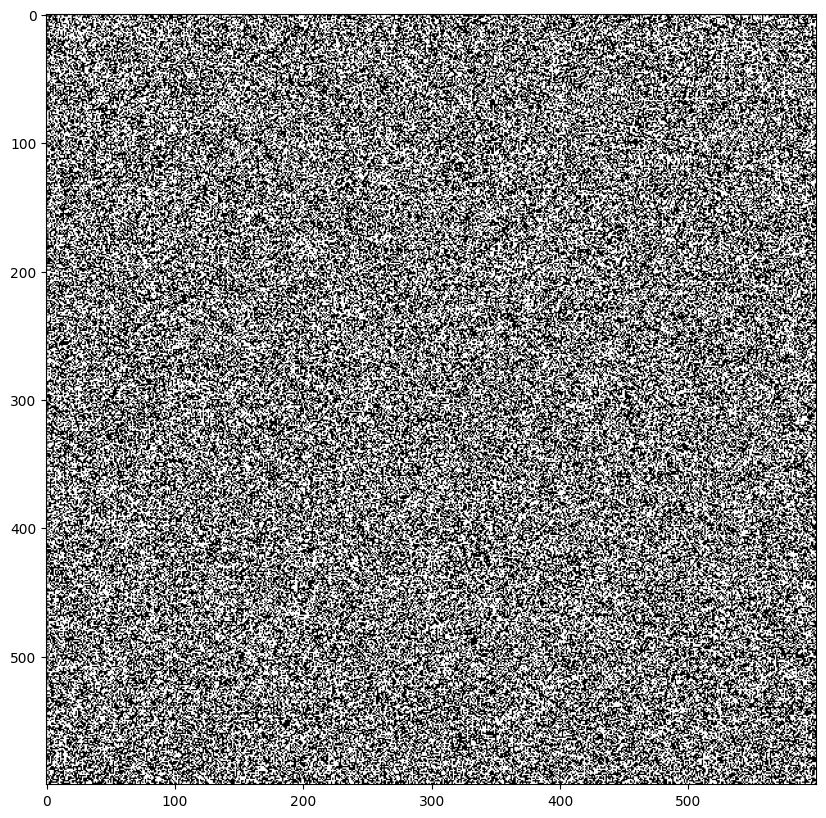

In [25]:
display_img(white_noise)

In [27]:
white_noise = white_noise * 255

In [28]:
white_noise

array([[  0, 255, 255, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255,   0],
       [255, 255,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0, 255, 255],
       [255, 255,   0, ..., 255, 255,   0]])

In [29]:
noise_img = white_noise + img

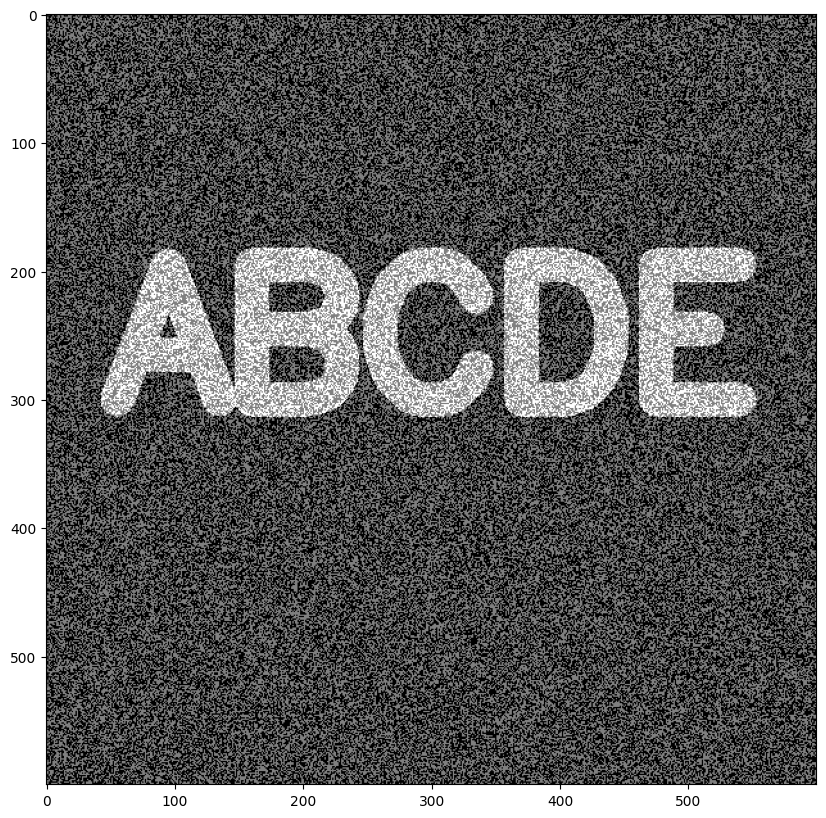

In [30]:
display_img(noise_img)

In [31]:
# lets use opening to get rid of noise

In [32]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

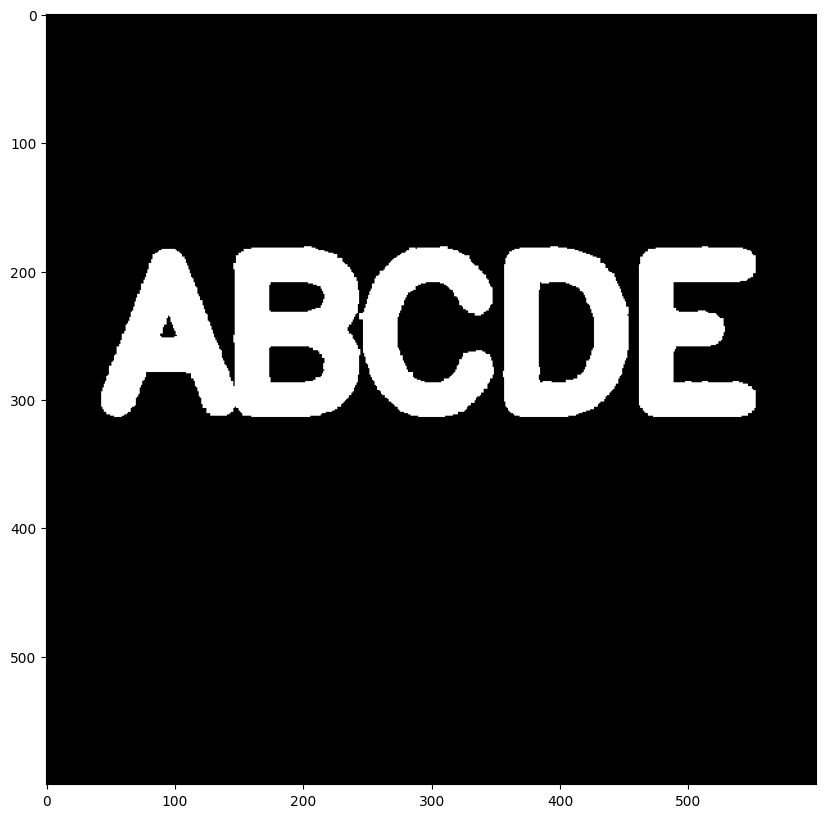

In [33]:
display_img(opening)

In [34]:
img = load_img()

In [36]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [37]:
black_noise

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 1]])

In [38]:
black_noise = black_noise * -255

In [39]:
black_noise

array([[   0,    0, -255, ...,    0,    0,    0],
       [   0, -255, -255, ...,    0,    0, -255],
       [-255, -255, -255, ..., -255, -255, -255],
       ...,
       [   0, -255,    0, ..., -255,    0, -255],
       [-255, -255, -255, ...,    0, -255,    0],
       [   0, -255, -255, ...,    0, -255, -255]])

In [40]:
black_noise_img = img + black_noise

In [42]:
black_noise_img[black_noise_img== -255] = 0

In [44]:
black_noise_img.min()

0.0

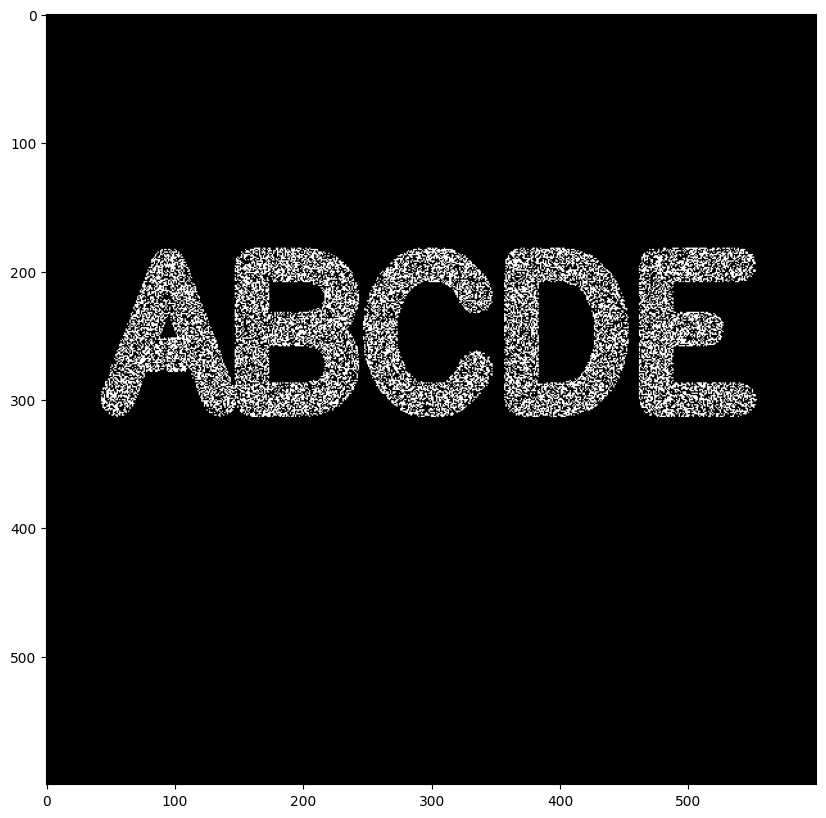

In [45]:
display_img(black_noise_img)

In [46]:
# let's look at closing

In [47]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

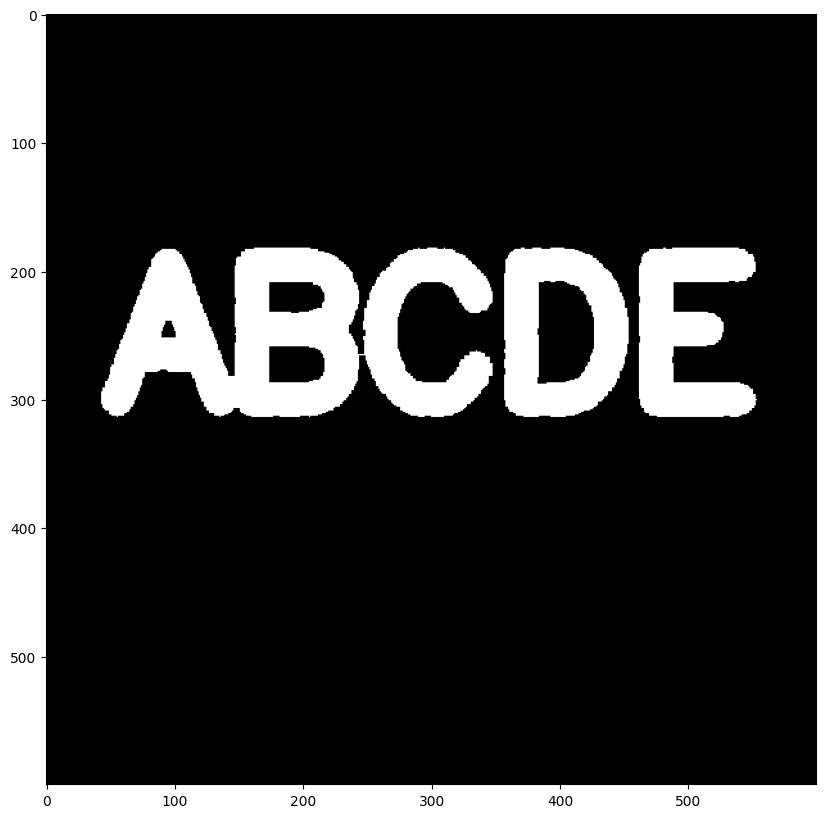

In [48]:
display_img(closing)

In [49]:
img = load_img()

In [51]:
# morphological gradient kind of like method of edge detection

In [52]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

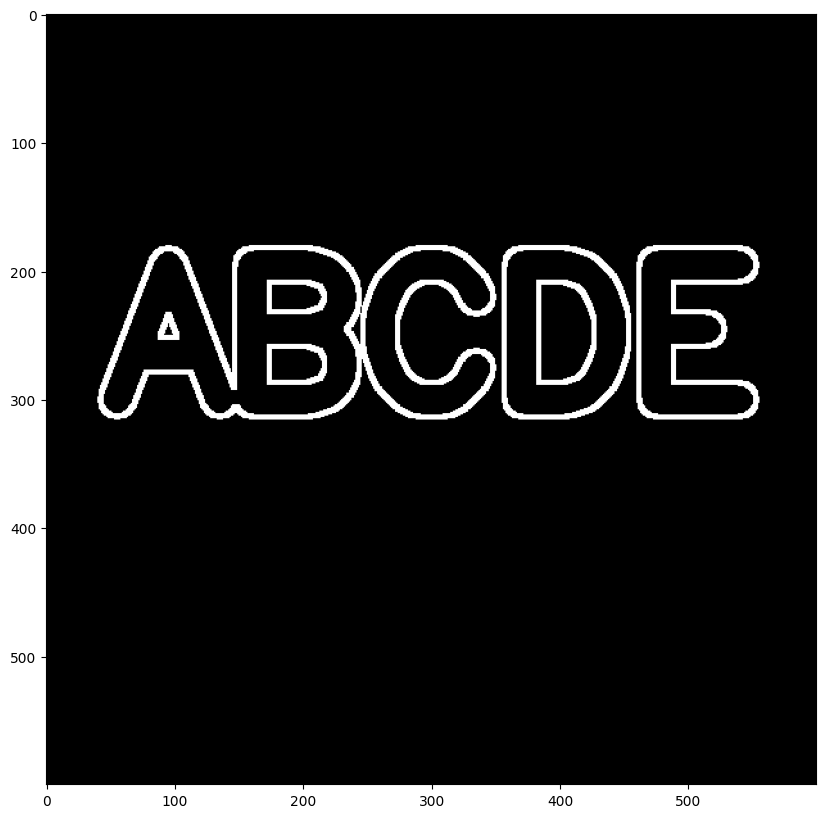

In [53]:
display_img(gradient)